<a href="https://colab.research.google.com/github/shara17-png/Bank-loan-prediction/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Predicting Approval for Bank Loan**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('bank_loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Loan_ID            614 non-null    int64
 1   Gender             614 non-null    int64
 2   Married            614 non-null    int64
 3   Dependents         614 non-null    int64
 4   Education          614 non-null    int64
 5   Self_Employed      614 non-null    int64
 6   ApplicantIncome    614 non-null    int64
 7   CoapplicantIncome  614 non-null    int64
 8   LoanAmount         614 non-null    int64
 9   Loan_Amount_Term   614 non-null    int64
 10  Credit_History     614 non-null    int64
 11  Property_Area      614 non-null    int64
 12  Loan_Status        614 non-null    int64
dtypes: int64(13)
memory usage: 62.5 KB


In [ ]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df.sample(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
53,LP001179,Male,Yes,2,Graduate,No,4616,0.0,134.0,360.0,1.0,Urban,N
211,LP001711,Male,Yes,3+,Graduate,No,3430,1250.0,128.0,360.0,0.0,Semiurban,N


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.shape

(614, 13)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

categorical values converted into numerical form

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
v=df.columns
for i in v:
  df[i]=le.fit_transform(df[i])

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,203,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,125,0,29,8,1,0,1
610,610,1,1,3,0,0,275,0,7,5,1,0,1
611,611,1,1,1,0,0,431,3,162,8,1,2,1
612,612,1,1,2,0,0,422,0,132,8,1,2,1


gender: male-1,female-0

married: no-0,yes-1

education:NOT GRADUATE-1,graduate-0

self employed:0-no,1-yes

loan status:0-no,1-yes

property area:0-rural,1-semiurban,2-urban

In [ ]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].median())
df['Gender']=df['Gender'].fillna(df['Gender'].median())
df['Married']=df['Married'].fillna(df['Married'].median())
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].median())
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

data visualization

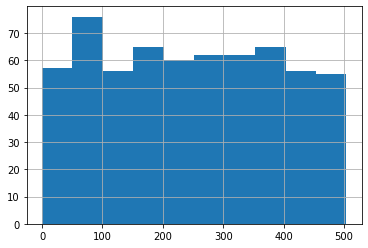

In [ ]:
df['ApplicantIncome'].hist()

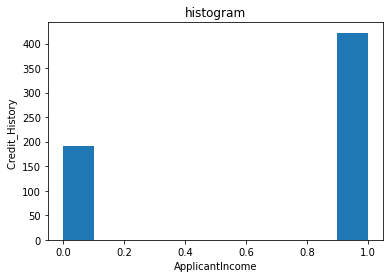

In [ ]:
plt.title('histogram')
plt.xlabel('ApplicantIncome')
plt.ylabel('Credit_History ')
plt.hist(df['Loan_Status'])
plt.show()

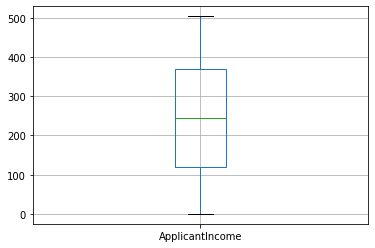

In [ ]:
df.boxplot(column='ApplicantIncome')

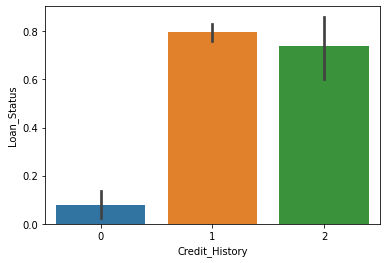

In [ ]:
sns.barplot(x='Credit_History',y='Loan_Status',data=df)

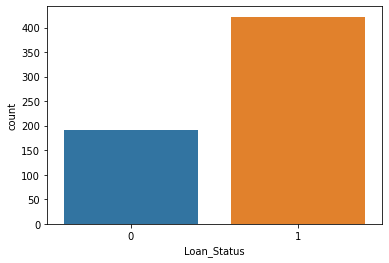

In [ ]:
sns.countplot(x='Loan_Status',data=df)

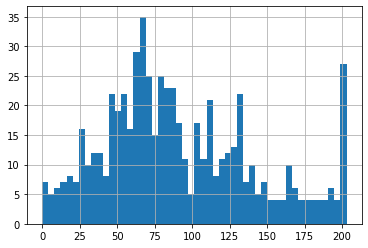

In [ ]:
df['LoanAmount'].hist(bins=50)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


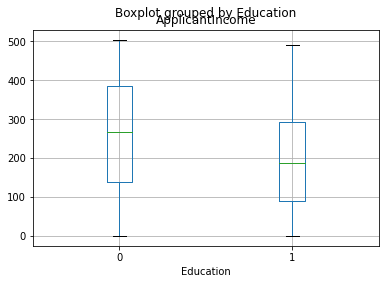

In [ ]:
df.boxplot(column='ApplicantIncome',by='Education')

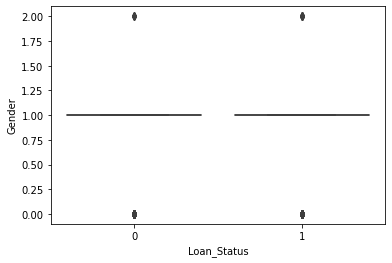

In [ ]:
sns.boxplot(x='Loan_Status',y='Gender',data=df)

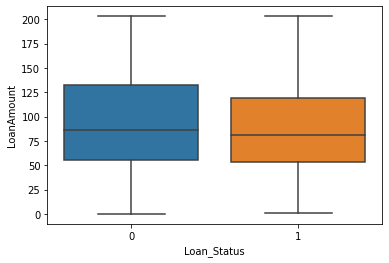

In [ ]:
sns.boxplot(x='Loan_Status',y='LoanAmount',data=df)

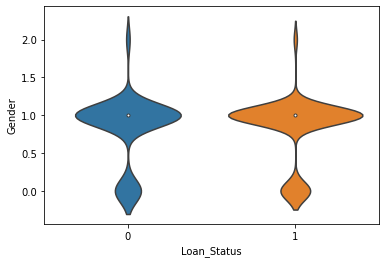

In [ ]:
sns.violinplot(x='Loan_Status',y='Gender',data=df)

In [ ]:
x=df.drop(['Loan_Status','Loan_ID'],axis=1)
y=df['Loan_Status']

In [ ]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,376,0,203,8,1,2
1,1,1,1,0,0,306,60,81,8,1,0
2,1,1,0,0,1,139,0,26,8,1,2
3,1,1,0,1,0,90,160,73,8,1,2
4,1,0,0,0,0,381,0,94,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0,29,8,1,0
610,1,1,3,0,0,275,0,7,5,1,0
611,1,1,1,0,0,431,3,162,8,1,2
612,1,1,2,0,0,422,0,132,8,1,2


In [ ]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
291,1,1,2,0,0,299,0,80,8,0,1
507,2,0,0,0,0,215,0,49,8,1,2
328,0,1,0,0,0,293,170,63,8,1,2
609,0,0,0,0,0,125,0,29,8,1,0
69,0,0,0,0,0,290,0,89,8,0,1
...,...,...,...,...,...,...,...,...,...,...,...
129,1,1,0,0,0,386,178,128,8,2,0
144,1,1,2,0,0,467,0,132,5,1,2
72,1,0,0,0,0,207,0,37,7,1,1
235,1,1,1,0,0,356,39,120,8,1,0


In [ ]:
y_train

291    0
507    0
328    0
609    1
69     0
      ..
129    0
144    1
72     1
235    1
37     1
Name: Loan_Status, Length: 491, dtype: int64

In [ ]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
533,1,0,1,0,0,464,0,138,8,2,1
544,0,1,0,1,0,143,9,55,8,2,1
41,1,0,0,0,0,17,35,12,8,1,2
148,0,0,0,0,0,454,77,150,8,1,0
111,0,1,0,0,2,129,157,92,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...
341,0,0,0,0,0,68,0,11,8,1,0
404,0,0,0,0,1,419,0,137,8,1,0
247,1,1,1,1,0,404,0,90,5,1,2
464,1,0,0,0,0,279,0,51,8,0,1


In [ ]:
y_test

533    0
544    1
41     1
148    0
111    1
      ..
341    0
404    0
247    1
464    0
493    1
Name: Loan_Status, Length: 123, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train

array([[ 0.374822  ,  0.68271415,  1.04669183, ...,  0.26677387,
        -1.95353433, -0.02050972],
       [ 2.82865671, -1.4123649 , -0.7693    , ...,  0.26677387,
         0.11814031,  1.23827431],
       [-2.0790127 ,  0.68271415, -0.7693    , ...,  0.26677387,
         0.11814031,  1.23827431],
       ...,
       [ 0.374822  , -1.4123649 , -0.7693    , ..., -0.57287979,
         0.11814031, -0.02050972],
       [ 0.374822  ,  0.68271415,  0.13869591, ...,  0.26677387,
         0.11814031, -1.27929374],
       [-2.0790127 ,  0.68271415, -0.7693    , ...,  0.26677387,
         0.11814031, -0.02050972]])

In [ ]:
x_test

array([[ 0.374822  , -1.4123649 ,  0.13869591, ...,  0.26677387,
         2.18981494, -0.02050972],
       [-2.0790127 ,  0.68271415, -0.7693    , ...,  0.26677387,
         2.18981494, -0.02050972],
       [ 0.374822  , -1.4123649 , -0.7693    , ...,  0.26677387,
         0.11814031,  1.23827431],
       ...,
       [ 0.374822  ,  0.68271415,  0.13869591, ..., -2.25218712,
         0.11814031,  1.23827431],
       [ 0.374822  , -1.4123649 , -0.7693    , ...,  0.26677387,
        -1.95353433, -0.02050972],
       [-2.0790127 , -1.4123649 , -0.7693    , ...,  0.26677387,
         0.11814031, -0.02050972]])

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
my_model=LogisticRegression()
result=my_model.fit(x_train,y_train)

In [ ]:
predictions=result.predict(x_test)
predictions

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('accuracy_score:',accuracy_score(y_test,predictions))
print('confusion_matrix:\n',confusion_matrix(y_test,predictions))
print('classification_report:\n',classification_report(y_test,predictions))

accuracy_score: 0.8130081300813008
confusion_matrix:
 [[17 22]
 [ 1 83]]
classification_report:
               precision    recall  f1-score   support

           0       0.94      0.44      0.60        39
           1       0.79      0.99      0.88        84

    accuracy                           0.81       123
   macro avg       0.87      0.71      0.74       123
weighted avg       0.84      0.81      0.79       123



In [ ]:
pred_new=my_model.predict([[1,0,0,0,0,376,0,203,8,1,2]])
pred_new

array([0])

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
my_model=DecisionTreeClassifier(random_state=1)
result=my_model.fit(x_train,y_train)

In [ ]:
predictions=result.predict(x_test)
predictions

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('accuracy_score:',accuracy_score(y_test,predictions))
print('confusion_matrix:\n',confusion_matrix(y_test,predictions))
print('classification_report:\n',classification_report(y_test,predictions))

accuracy_score: 0.7235772357723578
confusion_matrix:
 [[23 16]
 [18 66]]
classification_report:
               precision    recall  f1-score   support

           0       0.56      0.59      0.57        39
           1       0.80      0.79      0.80        84

    accuracy                           0.72       123
   macro avg       0.68      0.69      0.69       123
weighted avg       0.73      0.72      0.73       123



In [ ]:
pred_new=my_model.predict([[1,0,0,0,0,376,0,81,8,1,2]])
pred_new

array([1])

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
my_model=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=1)
result=my_model.fit(x_train,y_train)

In [ ]:
predictions=result.predict(x_test)
predictions

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('accuracy_score:',accuracy_score(y_test,predictions))
print('confusion_matrix:\n',confusion_matrix(y_test,predictions))
print('classification_report:\n',classification_report(y_test,predictions))

accuracy_score: 0.7886178861788617
confusion_matrix:
 [[18 21]
 [ 5 79]]
classification_report:
               precision    recall  f1-score   support

           0       0.78      0.46      0.58        39
           1       0.79      0.94      0.86        84

    accuracy                           0.79       123
   macro avg       0.79      0.70      0.72       123
weighted avg       0.79      0.79      0.77       123



In [ ]:
pred_new=my_model.predict([[1,0,0,0,0,376,0,81,8,1,2]])
pred_new

array([0])

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
my_model=KNeighborsClassifier(n_neighbors=5)
result=my_model.fit(x_train,y_train)

In [ ]:
predictions=result.predict(x_test)
predictions

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('accuracy_score:',accuracy_score(y_test,predictions))
print('confusion_matrix:\n',confusion_matrix(y_test,predictions))
print('classification_report:\n',classification_report(y_test,predictions))

accuracy_score: 0.7560975609756098
confusion_matrix:
 [[12 27]
 [ 3 81]]
classification_report:
               precision    recall  f1-score   support

           0       0.80      0.31      0.44        39
           1       0.75      0.96      0.84        84

    accuracy                           0.76       123
   macro avg       0.78      0.64      0.64       123
weighted avg       0.77      0.76      0.72       123



In [ ]:
pred_new=my_model.predict([[1,0,0,0,0,376,0,81,8,1,2]])
pred_new

array([1])

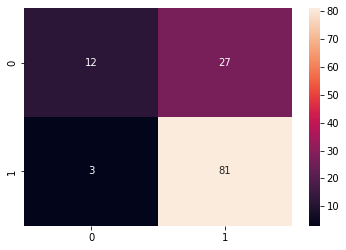

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True,fmt='2.0f')

SVM

In [ ]:
from sklearn.svm import SVC
my_model=SVC(kernel='rbf',random_state=1)
result=my_model.fit(x_train,y_train)

In [ ]:
predictions=result.predict(x_test)
predictions

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('accuracy_score:',accuracy_score(y_test,predictions))
print('confusion_matrix:\n',confusion_matrix(y_test,predictions))
print('classification_report:\n',classification_report(y_test,predictions))

accuracy_score: 0.8048780487804879
confusion_matrix:
 [[16 23]
 [ 1 83]]
classification_report:
               precision    recall  f1-score   support

           0       0.94      0.41      0.57        39
           1       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123



In [ ]:
pred_new=my_model.predict([[1,0,0,0,0,376,0,81,8,1,2]])
pred_new

array([1])

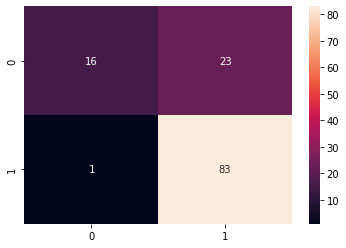

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True,fmt='2.0f')

the model with highest accuracy is:- logistic regression 